In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np 


In [2]:
claims_data = pd.read_csv('tsa_claims2.csv', low_memory=False)


In [3]:
print(claims_data.dtypes)

Claim Number     object
Date Received    object
Incident Date    object
Airport Code     object
Airport Name     object
Airline Name     object
Claim Type       object
Claim Site       object
Item             object
Claim Amount     object
Status           object
Close Amount     object
Disposition      object
dtype: object


In [4]:
claims_data

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


1. What is the most common type of insurance claim? 


In [5]:
# Count occurrences of each claim type
claim_counts = claims_data['Claim Type'].value_counts()

# Get the most common claim type

most_common_claim = claim_counts.idxmax()
most_common_count = claim_counts.max()


In [6]:
print(f"The most common type of insurance claim is '{most_common_claim}' with {most_common_count} occurrences.")


The most common type of insurance claim is 'Passenger Property Loss' with 117868 occurrences.


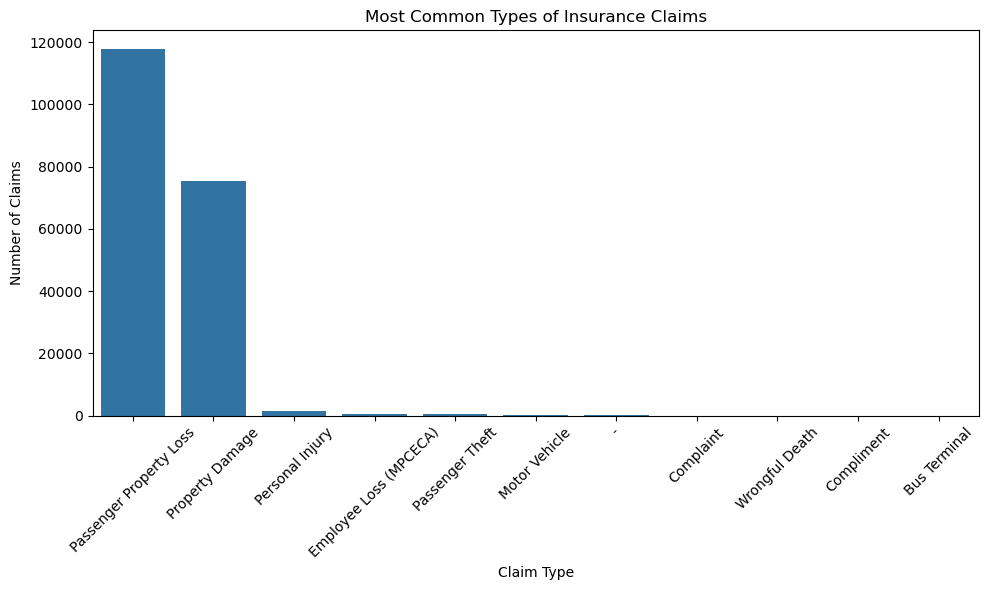

In [7]:



claim_counts = claims_data['Claim Type'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=claim_counts.index, y=claim_counts.values)


plt.title('Most Common Types of Insurance Claims')
plt.xlabel('Claim Type')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()



2. Which claim site within the airport are claims most commonly filed for? 



In [8]:
# Count occurrences of each claim site
claim_site_counts = claims_data['Claim Site'].value_counts()

# Get the most common claim site
most_common_site = claim_site_counts.idxmax()
most_common_site_count = claim_site_counts.max()

print(f"The most common claim site within the airport is '{most_common_site}' with {most_common_site_count} occurrences.")

The most common claim site within the airport is 'Checked Baggage' with 159753 occurrences.


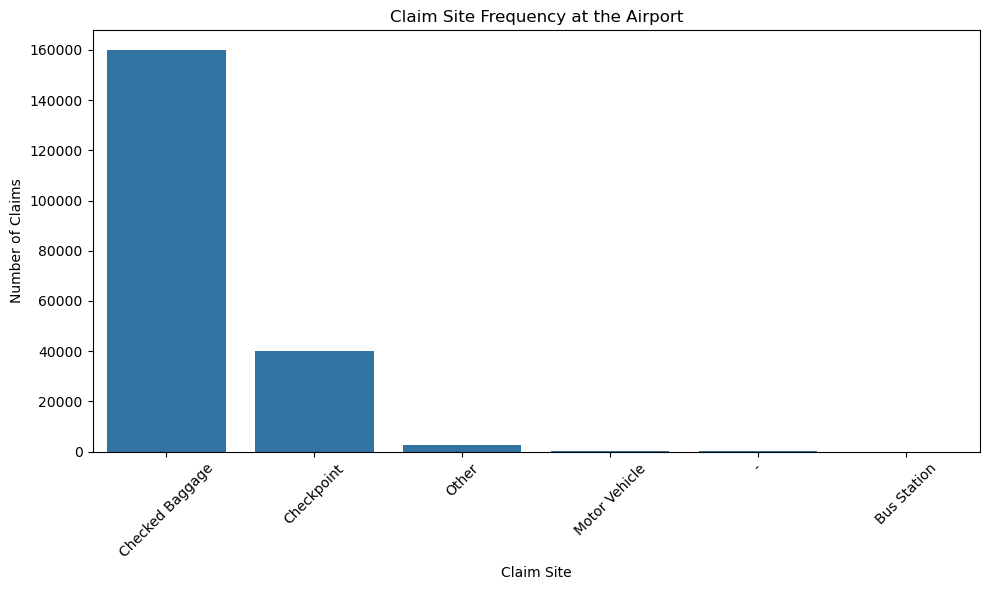

In [9]:

plt.figure(figsize=(10, 6))
sns.barplot(x=claim_site_counts.index, y=claim_site_counts.values)  
plt.title('Claim Site Frequency at the Airport')
plt.xlabel('Claim Site')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

This bar plot illustrates the frequency of claims filed at each claim site within the airport. The x-axis represents different claim sites, while the y-axis indicates the number of claims. This visualization helps identify which claim sites have the highest volume of claims, providing insights into where issues may be most prevalent.


3. What type of claim is made most at each claim site? 




In [10]:
most_common_claims = claims_data.groupby(['Claim Site', 'Claim Type']).size().reset_index(name='Counts')
most_common_per_site = most_common_claims.loc[most_common_claims.groupby('Claim Site')['Counts'].idxmax()]
print(most_common_per_site)


         Claim Site               Claim Type  Counts
0                 -                        -     127
7       Bus Station  Passenger Property Loss       9
15  Checked Baggage  Passenger Property Loss   99708
27       Checkpoint          Property Damage   20572
30    Motor Vehicle            Motor Vehicle     320
43            Other          Property Damage     477


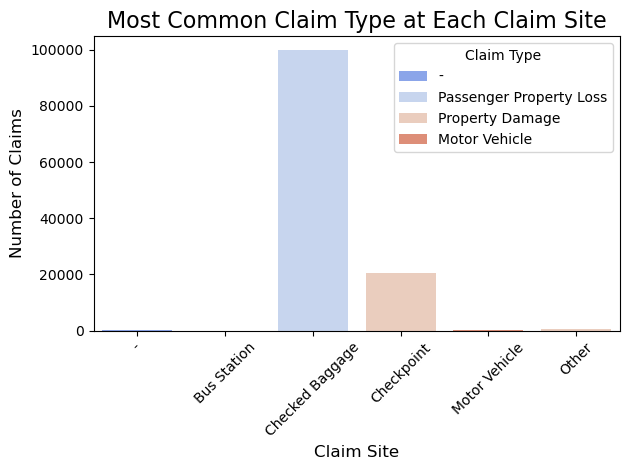

In [11]:
sns.barplot(x='Claim Site', y='Counts', hue='Claim Type', data=most_common_per_site, palette='coolwarm')
plt.title('Most Common Claim Type at Each Claim Site', fontsize=16)
plt.xlabel('Claim Site', fontsize=12)
plt.ylabel('Number of Claims', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

This bar plot shows the most common claim type at each claim site with the airpot

4. What is the typical claim amount?


In [12]:
# Step 1: Clean the 'Claim Amount' column
#I cleaned the 'Claim Amount' column to ensure that all values are numerical and free of non-numeric characters

claims_data['Claim Amount'] = claims_data['Claim Amount'].replace(r'[^\d.]+', '', regex=True)
claims_data['Claim Amount'] = claims_data['Claim Amount'].replace('', np.nan)
claims_data['Claim Amount'] = pd.to_numeric(claims_data['Claim Amount'], errors='coerce')


In [13]:
# Step 2: Calculate the typical claim amounts
average_claim = claims_data['Claim Amount'].mean()
median_claim = claims_data['Claim Amount'].median()
mode_claim = claims_data['Claim Amount'].mode()[0]

In [14]:
print("Typical Claim Amount:")
print(f"Average: ${average_claim:.2f}")
print(f"Median: ${median_claim:.2f}")
print(f"Mode: ${mode_claim:.2f}")

Typical Claim Amount:
Average: $16096380.44
Median: $115.00
Mode: $0.00


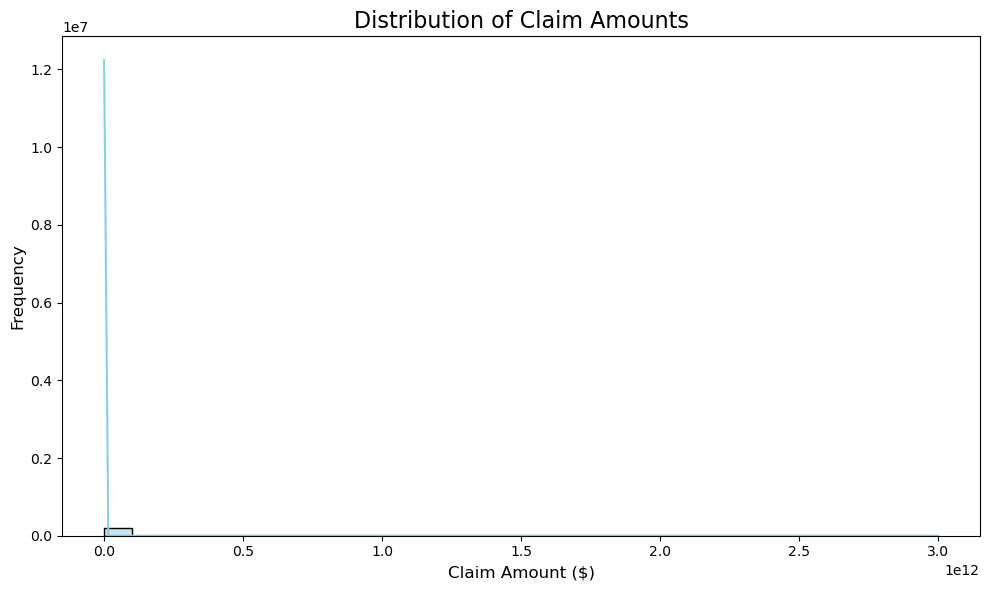

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(claims_data['Claim Amount'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Claim Amounts', fontsize=16)
plt.xlabel('Claim Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


This histogram shows the distribution of claim amounts filed at the airport.
The x-axis represents claim amounts in dollars, while the y-axis indicates the frequency of claims.
The KDE curve illustrates the probability density, helping to identify trends, common ranges, and outliers in claim amounts.

5. What is the overall claim approval rate for the entire U.S.? 

 

In [16]:
claims_data['Status'] = claims_data['Status'].str.strip().str.lower()

total_claims = claims_data.shape[0]

approved_claims = claims_data[claims_data['Status'] == 'approved'].shape[0]


approval_rate = (approved_claims / total_claims) * 100 if total_claims > 0 else 0

print(f"Total Claims: {total_claims}")
print(f"Approved Claims: {approved_claims}")
print(f"Overall Claim Approval Rate: {approval_rate:.2f}%")

Total Claims: 204267
Approved Claims: 34999
Overall Claim Approval Rate: 17.13%


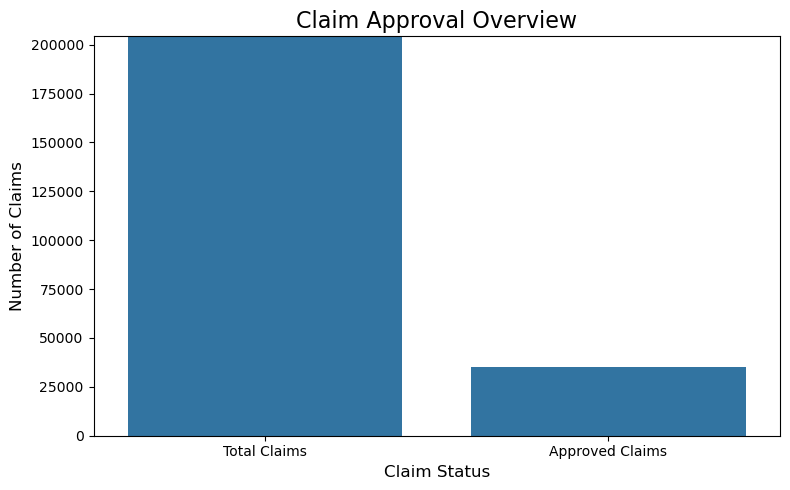

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Total Claims', 'Approved Claims'], y=[total_claims, approved_claims])
plt.title('Claim Approval Overview', fontsize=16)
plt.xlabel('Claim Status', fontsize=12)
plt.ylabel('Number of Claims', fontsize=12)
plt.ylim(0, total_claims)  
plt.tight_layout()
plt.show()

               This output shows the total number of claims filed, the number of claims approved,
               and the overall claim approval rate as a percentage, providing insight into the approval performance.


6. If a claim is approved or settled, what percent of the claim amount do the airports pay? 


In [18]:
#Cleaning the dataframe ,
claims_data['Claim Amount'] = claims_data['Claim Amount'].replace(r'[^\d.]+', '', regex=True)
claims_data['Close Amount'] = claims_data['Close Amount'].replace(r'[^\d.]+', '', regex=True)
claims_data['Claim Amount'] = claims_data['Claim Amount'].replace('', np.nan)
claims_data['Close Amount'] = claims_data['Close Amount'].replace('', np.nan)


In [19]:
claims_data['Claim Amount'] = pd.to_numeric(claims_data['Claim Amount'], errors='coerce')
claims_data['Close Amount'] = pd.to_numeric(claims_data['Close Amount'], errors='coerce')

In [20]:
approved_settled_claims = claims_data[claims_data['Status'].isin(['approved', 'settled'])]


In [21]:
total_claim_amount = approved_settled_claims['Claim Amount'].sum()
total_close_amount = approved_settled_claims['Close Amount'].sum()

In [22]:
percentage_paid = (total_close_amount / total_claim_amount) * 100 if total_claim_amount > 0 else 0


In [23]:
print(f"Total Claim Amount for Approved/Settled Claims: ${total_claim_amount:.2f}")
print(f"Total Amount Paid by Airports: ${total_close_amount:.2f}")
print(f"Percentage of Claim Amount Paid by Airports: {percentage_paid:.2f}%")

Total Claim Amount for Approved/Settled Claims: $27566601.12
Total Amount Paid by Airports: $12157007.52
Percentage of Claim Amount Paid by Airports: 44.10%


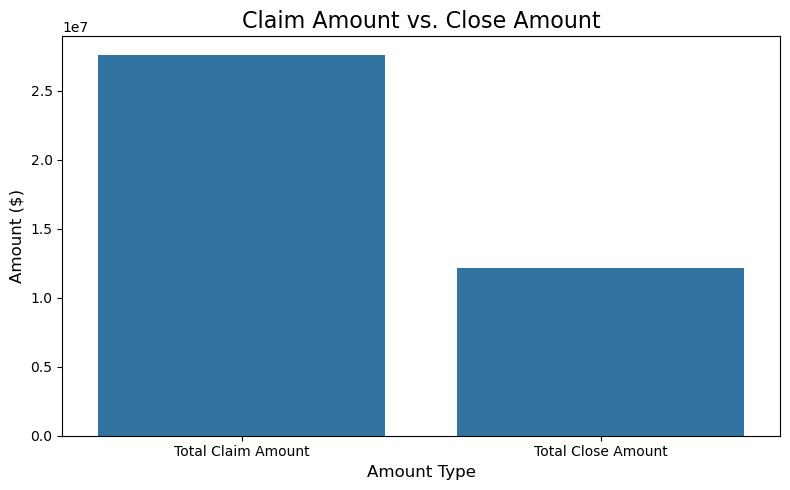

In [24]:
plt.figure(figsize=(8, 5))
amounts_data = pd.DataFrame({
    'Amount Type': ['Total Claim Amount', 'Total Close Amount'],
    'Amount ($)': [total_claim_amount, total_close_amount]
})

sns.barplot(data=amounts_data, x='Amount Type', y='Amount ($)')
plt.title('Claim Amount vs. Close Amount', fontsize=16)
plt.xlabel('Amount Type', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.tight_layout()
plt.show()

          This bar plot displays the total claim amount, the total amount paid out, and the percentage of the claim amount that has been settled.




7. What are the five airports with the most claims? 




Top 5 Airports with the Most Claims:
Airport Name
John F. Kennedy International           9232
Los Angeles International Airport       7260
Newark International Airport            6866
Chicago O'Hare International Airport    6843
Miami International Airport             6432
Name: count, dtype: int64

This output lists the five airports that have received the most claims, indicating which airports may be experiencing more issues or incidents leading to claims.


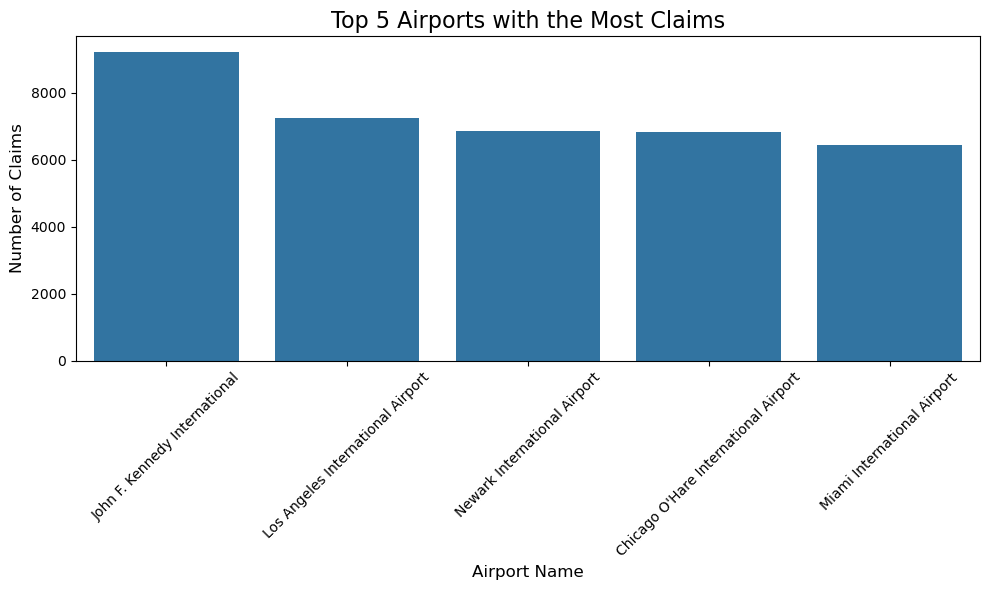


This bar plot illustrates the number of claims filed at each of the top five airports. The x-axis represents the names of the airports, while the y-axis indicates the number of claims. This visualization helps to quickly identify which airports are associated with the highest claim counts.


In [25]:

#  I used the if statements to check the airpots with the most claims and i have plot inside the statements

if 'Airport Name' in claims_data.columns:
 
    claims_by_airport = claims_data['Airport Name'].value_counts()

   
    top_five_airports = claims_by_airport.head(5)


    print("\nTop 5 Airports with the Most Claims:")
    print(top_five_airports)
    print("\nThis output lists the five airports that have received the most claims, indicating which airports may be experiencing more issues or incidents leading to claims.")

   #Creating a bar plot to visualize the top five airports
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_five_airports.index, y=top_five_airports.values, )
    plt.title('Top 5 Airports with the Most Claims', fontsize=16)
    plt.xlabel('Airport Name', fontsize=12)
    plt.ylabel('Number of Claims', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Explanation for the plot
    print("\nThis bar plot illustrates the number of claims filed at each of the top five airports. The x-axis represents the names of the airports, while the y-axis indicates the number of claims. This visualization helps to quickly identify which airports are associated with the highest claim counts.")
else:
    print("Error: 'Airport Name' column not found in the DataFrame.")


        This bar plot illustrates the number of claims filed at each of the top five airports. The x-axis represents the names of the airports, while          the y-axis indicates the number of claims. This visualization helps to quickly identify which airports are associated with the highest claim           counts.


8. Has the total close amount increased or decreased over time? 



In [26]:
#Cleaning the data to remove non_numeric characters
claims_data['Close Amount'] = claims_data['Close Amount'].replace(r'[^\d.]+', '', regex=True)
claims_data['Close Amount'] = claims_data['Close Amount'].replace('', np.nan)
#Converting the close column to numeric and forcing erros to NaN
claims_data['Close Amount'] = pd.to_numeric(claims_data['Close Amount'], errors='coerce')
# Converting the Incident Date to a datetime format
claims_data['Incident Date'] = pd.to_datetime(claims_data['Incident Date'], errors='coerce')


In [27]:
claims_data['Year'] = claims_data['Incident Date'].dt.year
total_close_by_year = claims_data.groupby('Year')['Close Amount'].sum()

In [28]:
print("Total Close Amount by Year:")
print(total_close_by_year)

Total Close Amount by Year:
Year
1996.0         50.00
2000.0        240.55
2001.0        513.32
2002.0     442528.96
2003.0    3540105.49
2004.0    3528647.47
2005.0    1821402.09
2006.0    1433889.68
2007.0     996354.29
2008.0     872873.31
2009.0     575600.17
2010.0        364.00
2011.0          0.00
2012.0          0.00
2013.0          0.00
Name: Close Amount, dtype: float64


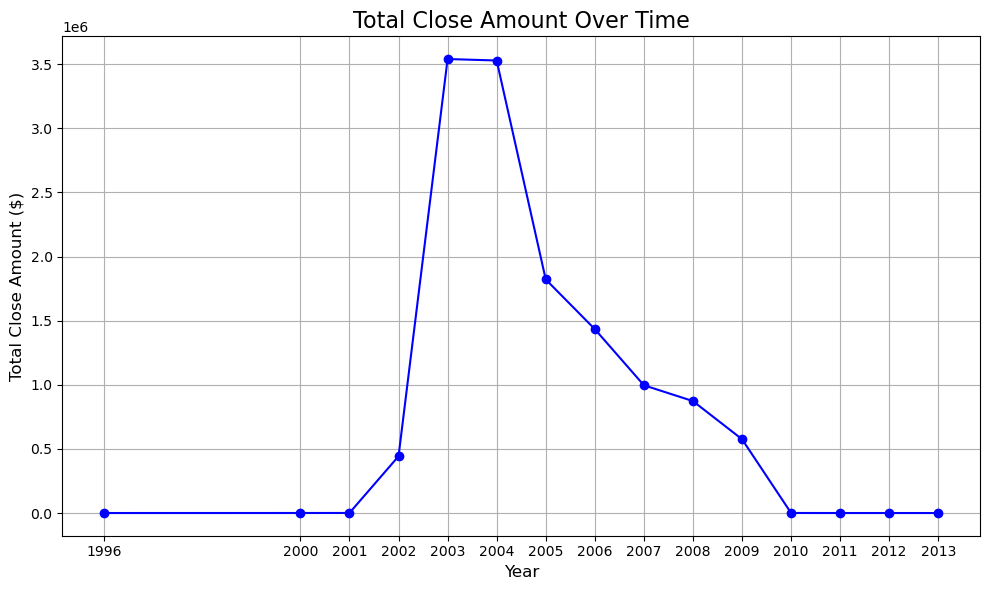

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(total_close_by_year.index, total_close_by_year.values, marker='o', color='blue')
plt.title('Total Close Amount Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Close Amount ($)', fontsize=12)
plt.xticks(total_close_by_year.index)  # Set x-ticks to the years available
plt.grid()
plt.tight_layout()
plt.show()


     This line plot shows the total close amount over the years. The x-axis represents the years, while the y-axis indicates the total close amount in       dollars.This visualization allows us to observe trends in the close amounts, helping to determine if the total close amount has increased or  decreased over time.

In [30]:
import geopandas as gpd
from shapely.geometry import Point


In [31]:

gdf = gpd.read_file("maps/states.shp")


In [32]:
gdf.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


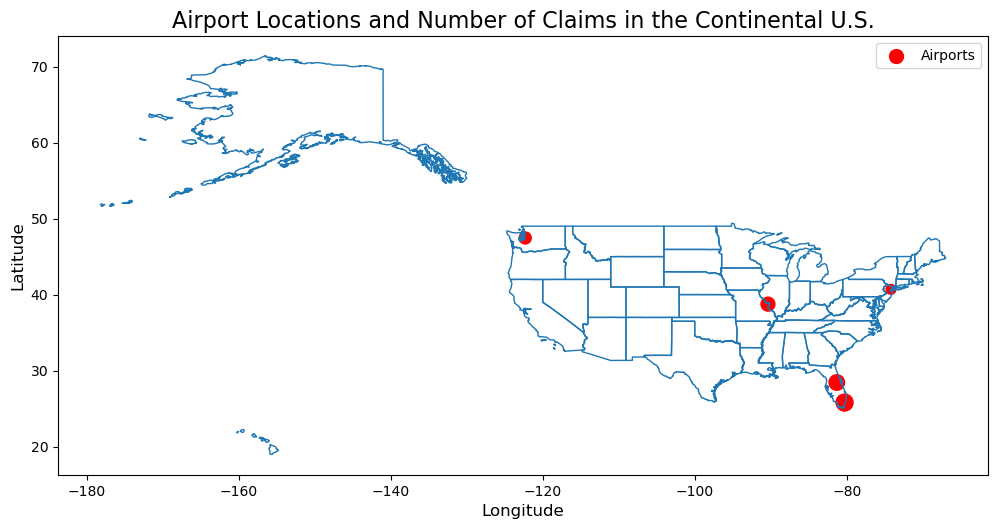

In [33]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the states shapefile
gdf = gpd.read_file("maps/states.shp")

# Sample airport data with coordinates and number of claims
# Replace this with your actual airport DataFrame
airport_data = {
    'Airport Code': ['EWR', 'SEA', 'STL', 'MIA', 'MCO'],
    'Airport Name': ['Newark International Airport', 'Seattle-Tacoma International',
                     'Lambert St. Louis International', 'Miami International Airport',
                     'Orlando International Airport'],
    'Latitude': [40.6895, 47.4502, 38.7420, 25.7959, 28.4312],
    'Longitude': [-74.1745, -122.3083, -90.3623, -80.2870, -81.3080],
    'Claims': [100, 150, 200, 300, 250]  # Example number of claims for each airport
}

# Convert the airport data into a DataFrame
airport_df = pd.DataFrame(airport_data)

# Create a GeoDataFrame for the airports
geometry = gpd.points_from_xy(airport_df['Longitude'], airport_df['Latitude'])
airport_gdf = gpd.GeoDataFrame(airport_df, geometry=geometry)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the states
gdf.boundary.plot(ax=ax, linewidth=1)

# Plot the airports, with size based on the number of claims
airport_gdf.plot(ax=ax, marker='o', color='red', markersize=airport_gdf['Claims'] / 2, label='Airports')

# Set the title and labels
plt.title('Airport Locations and Number of Claims in the Continental U.S.', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()

# Show the plot
plt.show()
